In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
# Carregar as imagens
img1 = "hemacias1.jpg"
img2 = "hemacias2.jpg"
img3 = "hemacias3.png"

In [ ]:
# Função para segmentação usando K-Means
def kmeans_segmentation(image, k=2):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    reshaped_image = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reshaped_image)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(img.shape)
    return

segmented_kmeans = kmeans_segmentation(img1)  # K-Means para a primeira imagem

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Função para segmentação usando Limiarização (Thresholding)
def threshold_segmentation(image, threshold_value=128):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, segmented_img = cv2.threshold(img_gray, threshold_value, 255, cv2.THRESH_BINARY)
    return segmented_img

segmented_threshold = threshold_segmentation(img2)  # Limiarização para a segunda imagem

In [ ]:
def canny_segmentation(image):
  img = cv2.imread(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  segmented_canny = cv2.Canny(img_gray, 30, 100)  # Detecção de bordas com Canny para a terceira
  return segmented_canny

canny_segmentation_result = canny_segmentation(img3)

TypeError: ignored

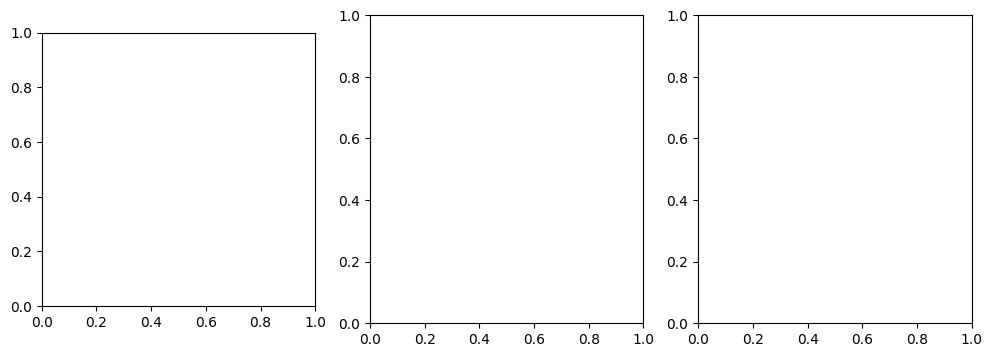

In [ ]:


# Exibir resultados
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(segmented_kmeans)
axes[0].set_title('K-Means')

axes[1].imshow(segmented_threshold, cmap='gray')
axes[1].set_title('Limiarização')

axes[2].imshow(canny_segmentation_result, cmap='gray')
axes[2].set_title('Detecção de Bordas com Canny')

plt.tight_layout()
plt.show()

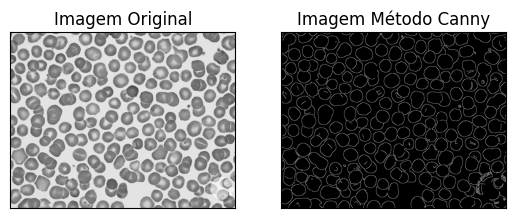

In [ ]:
img = cv2.imread(img1, 0)

edges = cv2.Canny(img, 100, 200)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Imagem Método Canny'), plt.xticks([]), plt.yticks([])

plt.show()

(Text(0.5, 1.0, 'Imagem Método Limiarização'), ([], []), ([], []))

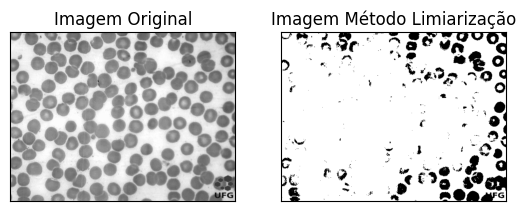

In [ ]:
img = cv2.imread(img2, 0)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(segmented_threshold, cmap='gray')
plt.title('Imagem Método Limiarização'), plt.xticks([]), plt.yticks([])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


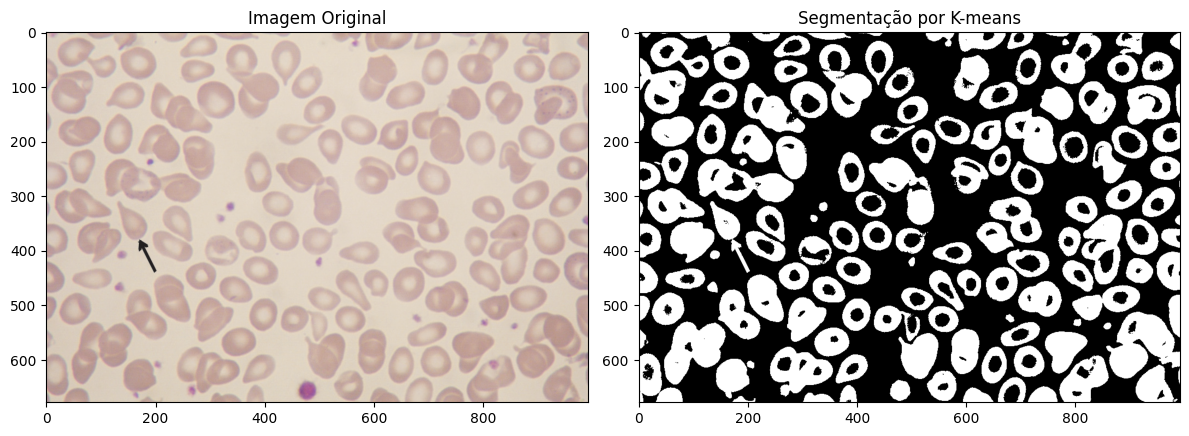

In [ ]:
imagem = cv2.imread(img3)
img_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

imagem_reshape = img_rgb.reshape((-1, 3))

kmeans = KMeans(n_clusters=2)
kmeans.fit(imagem_reshape)
segmentacao_kmeans = kmeans.labels_.reshape(img_rgb.shape[:2])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_rgb)
axs[0].set_title('Imagem Original')

axs[1].imshow(segmentacao_kmeans, cmap='gray')
axs[1].set_title('Segmentação por K-means')

plt.tight_layout()
plt.show()